# **RESTAURANTS ORDERS**
INTEGRANTES:

Reina Valeria Erazo Perez & Miguel Angel Corredor

Fuente - Kaggle

Esta base de datos presenta un total de 500 ordenes realizadas en un restaurante, presenta 8 columnas las cuales son:

- Order ID (int) – Identificador único de cada pedido.

- Customer Name (string) – Nombre del cliente que realizó el pedido.

- Food Item (string) – Plato específico solicitado (por ejemplo: Pizza, Pasta, Sopa, Brownie).

- Category (string) – Categoría del plato (Entrada, Plato Principal, Postre).

- Quantity (int) – Número de unidades del plato pedido (1–5).

- Price (float) – Precio del plato en la moneda local (2,06 – 24,99).

- Payment Method (string) – Método de pago utilizado (Efectivo, Tarjeta Débito, Tarjeta Crédito, Pago en Línea).

- Order Time (datetime) – Fecha y hora en que se realizó el pedido.


**Objetivo principal:**
Analizar los patrones de consumo en los pedidos de comida, identificando qué factores influyen en la elección de los clientes, el gasto realizado y los métodos de pago más utilizados.

**Objetivos específicos**

- Identificar los tipos y categorías de comida más solicitados por los clientes.

- Analizar cómo el tipo de comida, la categoría y el método de pago influyen en los ingresos del restaurante.

- Reconocer patrones de consumo según los días de mayor demanda.

**Preguntas de investigación:**

PREGUNTA CENTRAL:

¿De qué manera el tipo de comida, la categoría de los productos y el método de pago influyen en la demanda y en los ingresos generados por el restaurante?

PREGUNTAS DE APOYO:

¿Qué tipo de comida es la más solicitada?

¿Qué categorías de comida (entradas, platos principales, postres) son las más solicitadas?

¿Qué categoría genera más ingresos?

¿Hay días en los que se concentran más pedidos?

¿Existen diferencias en el gasto promedio según el método de pago utilizado?


**Durante esta primera parte se presentaran los datos seleccionados.**


In [ ]:
#Importar librerias para iniciar con el analisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Corregir el nombre del archivo para que coincida con el archivo cargado
DataFrame = pd.read_csv('/content/restaurant_orders.csv')
DataFrame

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56
...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06


In [ ]:
# Identificar tipos de variables
print("\nTipos de variables:")
display(DataFrame.info())

# Detectar posibles problemas (valores faltantes y duplicados)
print("\nValores faltantes por columna:")
display(DataFrame.isnull().sum())

print("\nNúmero de filas duplicadas:")
display(DataFrame.duplicated().sum())

# Mostrar distribuciones iniciales (estadísticas descriptivas)
print("\nEstadísticas descriptivas:")
# Resumen solo de columnas numéricas
print("\nTabla que representa valores numericos:")
numeric_summary = DataFrame.describe().T   # .T para transponer y ver mejor
display(numeric_summary)

# Resumen solo de columnas categóricas
print("\nTabla que representa valores categoricos:")
categorical_summary = DataFrame.describe(include=['object']).T
display(categorical_summary)

# Mostrar las primeras filas
print("\nPrimeras 5 filas de la base de datos:")
display(DataFrame.head())


Tipos de variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        500 non-null    int64  
 1   Customer Name   500 non-null    object 
 2   Food Item       500 non-null    object 
 3   Category        500 non-null    object 
 4   Quantity        500 non-null    int64  
 5   Price           500 non-null    float64
 6   Payment Method  500 non-null    object 
 7   Order Time      500 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


None


Valores faltantes por columna:


,0
Order ID,0
Customer Name,0
Food Item,0
Category,0
Quantity,0
Price,0
Payment Method,0
Order Time,0



Número de filas duplicadas:


np.int64(0)


Estadísticas descriptivas:

Tabla que representa valores numericos:


,count,mean,std,min,25%,50%,75%,max
Order ID,500.0,5683.29600,2599.688068,1055.00,3342.00,5762.000,7945.00,9997.00
Quantity,500.0,3.03000,1.474261,1.00,2.00,3.000,4.00,5.00
Price,500.0,13.19718,6.685852,2.06,7.28,13.305,19.08,24.99



Tabla que representa valores categoricos:


,count,unique,top,freq
Customer Name,500,497,Michael Smith,2
Food Item,500,9,Pizza,68
Category,500,3,Dessert,168
Payment Method,500,4,Cash,132
Order Time,500,500,2025-08-09 05:11:27,1



Primeras 5 filas de la base de datos:


,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56


- La limpieza y organizacion de los datos es parte fundamental para lograr realizar un analisis correctamente, por lo cual en esta parte, decidimos desglosar los datos obtenidos en la columna 'Order time' para obtener asi el dia en que fue realizado el pedido y poder relacionar esta variable con las compras en el restaurante.

In [ ]:
# Lo primero es tener claro de que la columna 'Order Time' sea tipo datetime
DataFrame['Order Time'] = pd.to_datetime(DataFrame['Order Time'])

# Extraer el día de la semana (0 = Lunes, 6 = Domingo)
DataFrame['Order Day of Week'] = DataFrame['Order Time'].dt.dayofweek

# Asignar un número a cada nombre del día
days = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
DataFrame['Order Day Name'] = DataFrame['Order Day of Week'].map(days)

# Crear una columna para indicar si es fin de semana o día de semana
DataFrame['Order Day Type'] = DataFrame['Order Day of Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Mostrar las primeras filas con las nuevas columnas
print("Primeras 5 filas con las nuevas columnas de día de la semana y tipo de día:")
display(DataFrame.head())

# Mostrar el conteo de pedidos por tipo de día para verificar
print("\nConteo de pedidos por tipo de día:")
display(DataFrame['Order Day Type'].value_counts())



Primeras 5 filas con las nuevas columnas de día de la semana y tipo de día:


,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,Order Day of Week,Order Day Name,Order Day Type
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,6,Domingo,Weekend
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,6,Domingo,Weekend
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,1,Martes,Weekday
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,3,Jueves,Weekday
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,5,Sábado,Weekend



Conteo de pedidos por tipo de día:


,count
Order Day Type,
Weekday,358
Weekend,142


In [ ]:
# Seleccionar solo columnas numéricas
numeric_df = DataFrame.select_dtypes(include=['int64', 'float64'])
print("Estadísticas de columnas numéricas:")
display(numeric_df.describe().T)

# Seleccionar solo columnas categóricas (object, string, datetime)
categorical_df = DataFrame.select_dtypes(include=['object'])
print("Estadísticas de columnas categóricas:")
display(categorical_df.describe().T)

Estadísticas de columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Order ID,500.0,5683.29600,2599.688068,1055.00,3342.00,5762.000,7945.00,9997.00
Quantity,500.0,3.03000,1.474261,1.00,2.00,3.000,4.00,5.00
Price,500.0,13.19718,6.685852,2.06,7.28,13.305,19.08,24.99


Estadísticas de columnas categóricas:


,count,unique,top,freq
Customer Name,500,497,Michael Smith,2
Food Item,500,9,Pizza,68
Category,500,3,Dessert,168
Payment Method,500,4,Cash,132
Order Day Name,500,7,Miércoles,82
Order Day Type,500,2,Weekday,358


Se evidencia en las tablas que la mayoría de los pedidos son de 3 artículos en promedio, lo que demuestra preferencias por compras pequeñas.

En cuanto al precio, aunque se identifican extremos desde 2.06 hasta 24,99, lo significativo es que la mayoría de los productos se ubican en un rango medio entre 7 y 19.

### Medidas de Dispersión

Para entender la dispersión de los datos es importante calcular e interpretar el rango, la varianza y la desviación estándar para las columnas numéricas 'Quantity' y 'Price'

In [ ]:
# Seleccionar las columnas numéricas relevantes
numeric_cols = ['Quantity', 'Price']

# Calcular el rango
# El rango es la diferencia entre el valor máximo y el valor mínimo
range_quantity = DataFrame['Quantity'].max() - DataFrame['Quantity'].min()
range_price = DataFrame['Price'].max() - DataFrame['Price'].min()

# Calcular la varianza
variance_quantity = DataFrame['Quantity'].var()
variance_price = DataFrame['Price'].var()

# Calcular la desviación estándar
std_dev_quantity = DataFrame['Quantity'].std()
std_dev_price = DataFrame['Price'].std()

print(f"Medidas de Dispersión para 'Quantity':")
print(f"  Rango: {range_quantity}")
print(f"  Varianza: {variance_quantity:.2f}")
print(f"  Desviación Estándar: {std_dev_quantity:.2f}")
print("\n")
print(f"Medidas de Dispersión para 'Price':")
print(f"  Rango: {range_price:.2f}")
print(f"  Varianza: {variance_price:.2f}")
print(f"  Desviación Estándar: {std_dev_price:.2f}")

Medidas de Dispersión para 'Quantity':
  Rango: 4
  Varianza: 2.17
  Desviación Estándar: 1.47


Medidas de Dispersión para 'Price':
  Rango: 22.93
  Varianza: 44.70
  Desviación Estándar: 6.69


**Interpretación de las Medidas de Dispersión:**

*   **Rango:** Indica la amplitud total de los datos.
    *   Para 'Quantity', el rango de 4 significa que las cantidades pedidas varían entre 1 y 5 unidades.
    *   Para 'Price', el rango de 22.93 indica que los precios varían entre 2.06 y 24.99.

*   **Varianza:** Mide cuán dispersos están los datos respecto a la media. Un valor alto indica que los puntos de datos están muy dispersos; un valor bajo indica que están agrupados cerca de la media.
    *   La varianza de 'Quantity' 2.17 es relativamente baja, lo que sugiere que la mayoría de los pedidos tienen cantidades de artículos similares a la cantidad promedio.
    *   La varianza de 'Price' 44.70 es más alta que la de 'Quantity', lo que indica una mayor dispersión en los precios de los platos. Hay más variabilidad en cuánto cuesta un plato que en cuántos artículos se piden en un pedido.

*   **Desviación Estándar:** Es la raíz cuadrada de la varianza y se interpreta en las mismas unidades que los datos originales, lo que la hace más fácil de entender que la varianza. Mide la dispersión promedio de los datos respecto a la media.
    *   Una desviación estándar de 1.17 para 'Quantity' significa que, en promedio, la cantidad pedida se desvía en aproximadamente 1.17 unidades de la cantidad promedio.
    *   Una desviación estándar de 6.69 para 'Price' indica que, en promedio, el precio de un plato se desvía en aproximadamente 6.69 de la media de precios. La desviación estándar más alta para 'Price' confirma que hay más variabilidad en los precios que en las cantidades.


***

Ahora bien, es necesario relacionar la variables con el fin de dar respuesta a las preguntas de apoyo y, de esta manera, lograr responder la pregunta problema.

En esta siguiente parte, se mostrara la relacion de las variables y su respectivo analisis.

## **Ítems más vendidos**
 **¿Qué tipo de comida es la más solicitada?**

Para responder esta pregutna es necesario relacionar los tipos de comida con la cantidad total pedida de la misma. Para hace utilizaremeos un grafico de barras, donde sera posible evidenciar facilmente cual item es el mas vendido


/tmp/ipython-input-3259549687.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=food_item_quantity.values, y=food_item_quantity.index, palette='viridis')


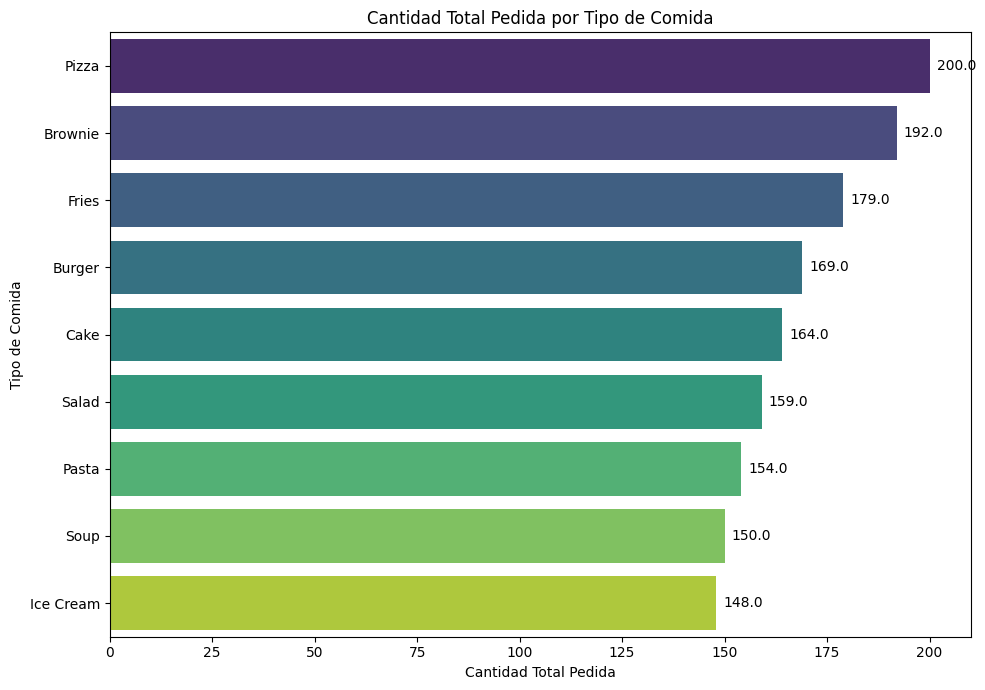

In [ ]:
# Calcular la cantidad total pedida por cada Food Item
food_item_quantity = DataFrame.groupby('Food Item')['Quantity'].sum().sort_values(ascending=False)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=food_item_quantity.values, y=food_item_quantity.index, palette='viridis')
plt.title('Cantidad Total Pedida por Tipo de Comida')
plt.xlabel('Cantidad Total Pedida')
plt.ylabel('Tipo de Comida')

# Añadir el valor numérico al final de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')


plt.tight_layout()
plt.show()

Segun la tabla, el tipo de comida mas vedido es pizza con un total de 200 ordenes y el menos vendido es Ice Cream con un total de 148 ordenes.

### **CATEGORIA VS CANTIDAD**

**¿En qué categoría se piden más unidades en promedio?**

Siguiendo con el analisis de que productos son los mas vendidos, entraremos a relacionar la categoria y la cantidad de productos vendidos por categoria.

/tmp/ipython-input-2117065450.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_quantity.index, y=category_quantity.values, palette='viridis')


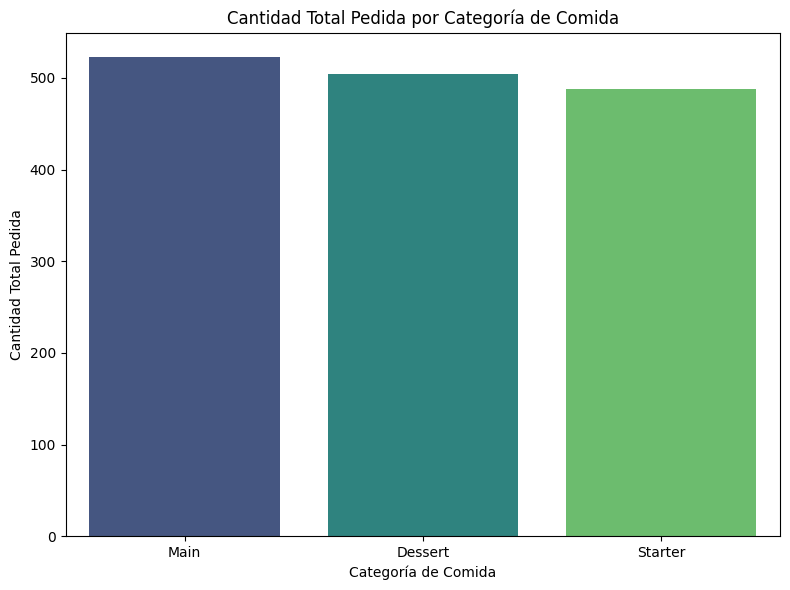

In [ ]:
# Calcular la cantidad total pedida por cada Category
category_quantity = DataFrame.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=category_quantity.index, y=category_quantity.values, palette='viridis')
plt.title('Cantidad Total Pedida por Categoría de Comida')
plt.xlabel('Categoría de Comida')
plt.ylabel('Cantidad Total Pedida')
plt.tight_layout()
plt.show()

### **Category VS Price**

**¿Qué categoría genera más ingresos?**

y ahora bien, aunque evidentemente los productos de la categoria main son los mas vendidos y los de Startes son los menos vendidos, al relacionar la categoria con el total de ingresos realizados, se evidencia que la categoria Starter es la que mas genera ingresos.




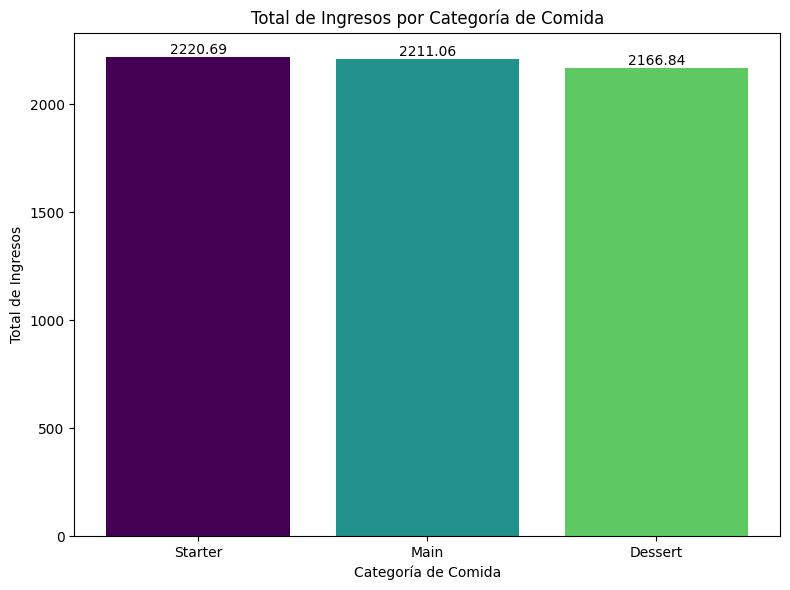

In [ ]:
# Calcular el total de ingresos (suma de Price) por cada Category
total_revenue_by_category = DataFrame.groupby('Category')['Price'].sum().sort_values(ascending=False)

# Crear un gráfico de barras usando matplotlib
plt.figure(figsize=(8, 6))
ax = plt.bar(total_revenue_by_category.index, total_revenue_by_category.values, color=['#440154', '#21918c', '#5ec962']) # Usando colores de la paleta viridis
plt.title('Total de Ingresos por Categoría de Comida')
plt.xlabel('Categoría de Comida')
plt.ylabel('Total de Ingresos')

# Añadir el valor numérico encima de cada barra
for p in ax.patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

La categoría Starter (Entradas) es la que ha generado la mayor cantidad de ingresos, seguida por Main (Platos Principales) y por ultimo Dessert (Postres). Aunque la diferencia en ingresos totales entre las categorías es relativamente pequeña.

### **VENTAS VS DIAS DE LA SEMANA**
**¿Hay días en los que se concentran más pedidos?**

En esta comparacion se quiere evidenciar que dias de la semana se realizan mas pedidos, en este caso entre semana o los fin de semana, y asi mismo si existe un dia en especifico donde son mas frecuentes las compras.
- En primer lugar se hace la comparacion entre los dias de la semana

/tmp/ipython-input-2162193179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='viridis')


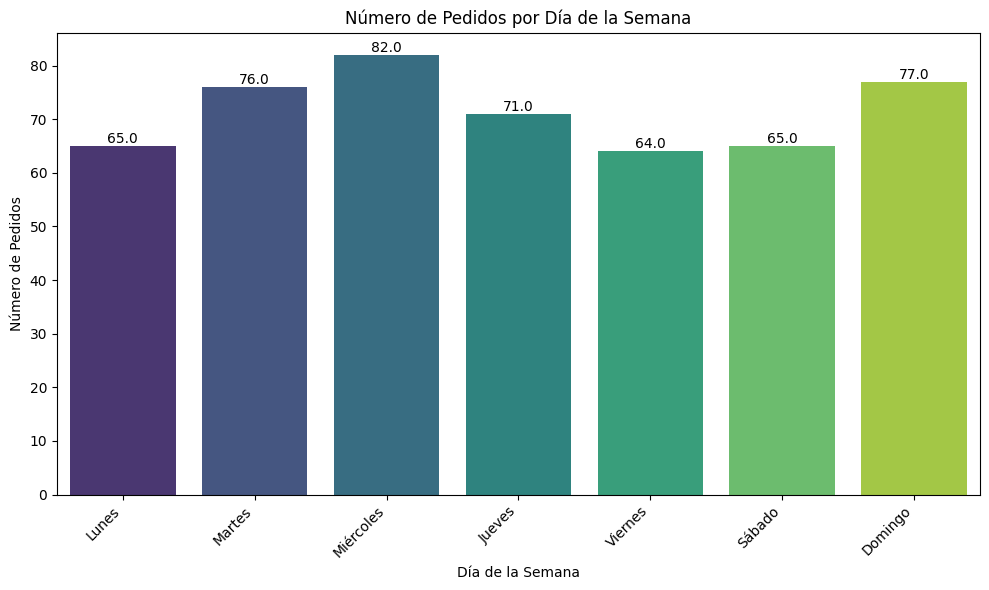

In [ ]:
# Contar el número de pedidos por día de la semana
orders_by_day = DataFrame['Order Day Name'].value_counts().reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='viridis')
plt.title('Número de Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45, ha='right')

# Añadir el valor numérico encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Segun la grafica se evidencia que el dia en el cual se realizan mas pedidos es el miercoles con un total de 82 pedidos, seguido del domingo con 77 pedidos y el martes con 76 pedidos. El dia que menos recibe pedidos es el viernes con 64 pedidos, seguido de lunes y sabado con 65 pedidos, y por ultimo el jueves con 71 pedidos.

/tmp/ipython-input-3970988776.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_revenue_by_day.index, y=total_revenue_by_day.values, palette='viridis')


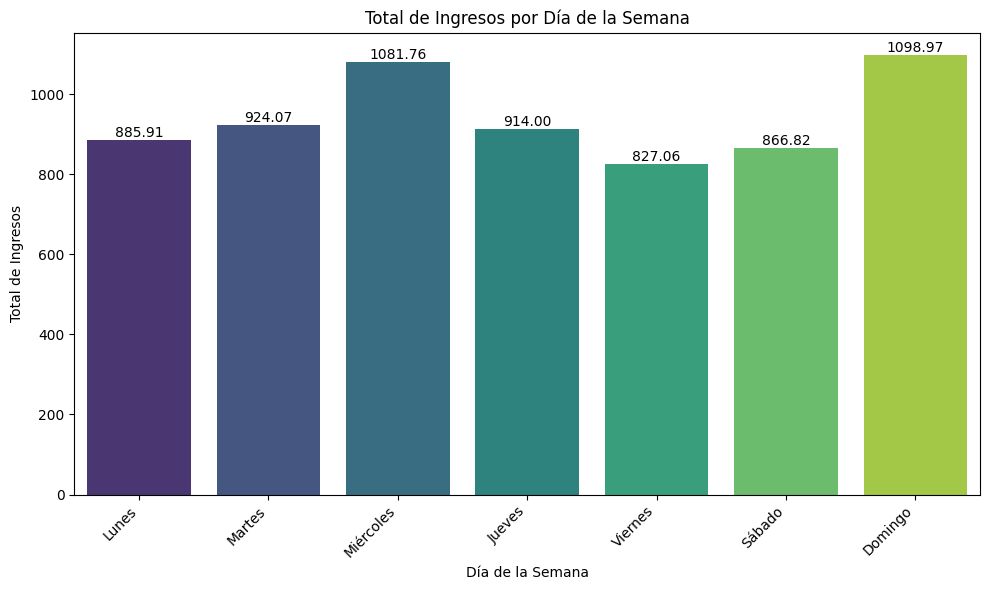

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el total de ingresos por día de la semana
total_revenue_by_day = DataFrame.groupby('Order Day Name')['Price'].sum().reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Crear un gráfico de barras para el total de ingresos por día de la semana
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_revenue_by_day.index, y=total_revenue_by_day.values, palette='viridis')
plt.title('Total de Ingresos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45, ha='right')

# Añadir el valor numérico encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Aunque la mayor cantidad de pedidos se realiza el dia miercoles, el restaurante recolecta mas dinero el domingo con un total de 1098.97 seguido del miercoles con $1081.76

Ahora, se busca identificar si durante la semana se generan mas pedidos, o por el contrario es durante el fin de semana.
Para esto se busca relacionar el numero total de pedidos durante la semana con el numero total de pedidos en el fin de semana.

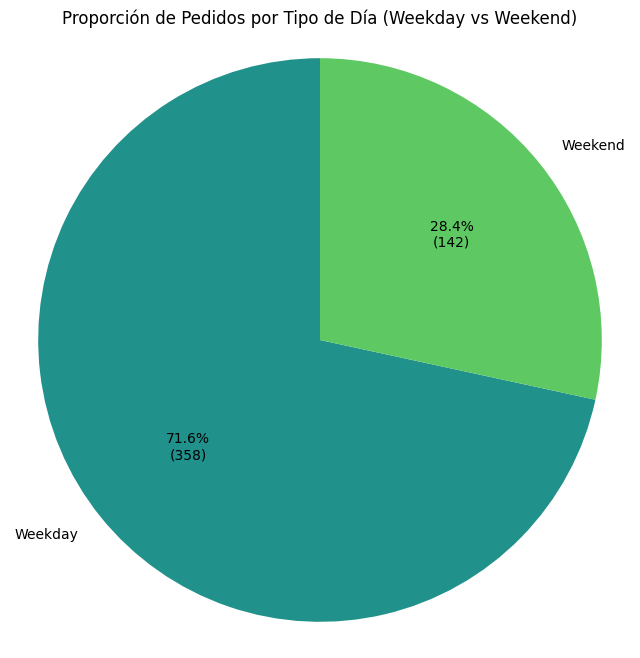

In [ ]:
# Contar el número de pedidos por tipo de día (Weekday/Weekend)
orders_by_day_type = DataFrame['Order Day Type'].value_counts()

# Crear un gráfico de pastel (pie chart)
plt.figure(figsize=(8, 8))

# Función para formatear el autopct con porcentaje y valor total
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})' # Formato: Porcentaje%\n(Total)
    return my_format

plt.pie(orders_by_day_type.values, labels=orders_by_day_type.index, autopct=autopct_format(orders_by_day_type.values), startangle=90, colors=['#21918c', '#5ec962']) # Using colors from viridis palette
plt.title('Proporción de Pedidos por Tipo de Día (Weekday vs Weekend)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/tmp/ipython-input-2577177266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_revenue_by_day_type.index, y=total_revenue_by_day_type.values, palette='viridis')


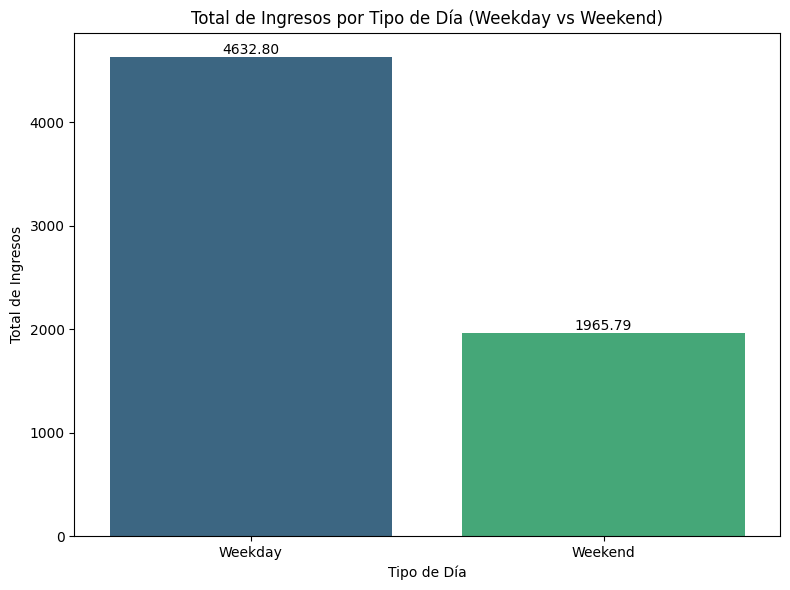

In [ ]:

# Calculate the total revenue by day type (Weekday/Weekend)
total_revenue_by_day_type = DataFrame.groupby('Order Day Type')['Price'].sum().sort_values(ascending=False)

# Crear un gráfico de barras para el total de ingresos por tipo de día
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=total_revenue_by_day_type.index, y=total_revenue_by_day_type.values, palette='viridis')
plt.title('Total de Ingresos por Tipo de Día (Weekday vs Weekend)')
plt.xlabel('Tipo de Día')
plt.ylabel('Total de Ingresos')

# Añadir el valor numérico encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Las graficas pasadas permiten confimar que entre lunes y viernes se generan mas pedidos, por lo cual mas ingresos que durante el fin de semana. Pues para weekday se tiene un total de 358 (71.6%), mientras que weekend presenta un total de 142 (28.4%).

- Es importante tener en cuenta que la barra correspondiente a los días de semana representa un total de cinco días (lunes a viernes), mientras que la del fin de semana incluye únicamente dos días (sábado y domingo). Esta diferencia en la cantidad de días explica por qué los totales de los días de semana son naturalmente más altos.






# **Gasto promedio vs Metodo de pago**
**¿Existen diferencias en el gasto promedio según el método de pago utilizado?**

Por ultimo se busca identificar si hay una influencia en el gasto que realizan los clientes, a partir del metodo de pago que utilizan.

Para esto es necesario crear una nueva variable donde se guarde el promedio de los gastos a partir de cada metodo de pago utilizado.


Gasto promedio por método de pago:


,Price
Payment Method,
Cash,13.860379
Online Payment,13.081818
Debit Card,12.970084
Credit Card,12.833438


/tmp/ipython-input-1981272169.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_price_by_payment.index, y=average_price_by_payment.values, palette='viridis')


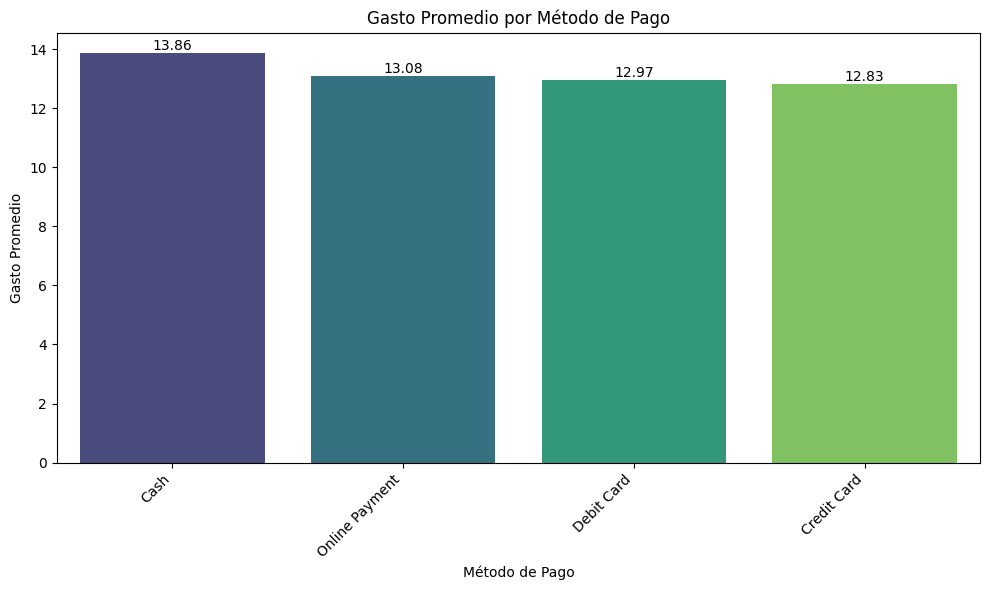

In [ ]:
# Calcular el gasto promedio por método de pago
"""
Crea una nueva variable (average_price_by_payment) la cual contiene una tabla
con el promedio de los gastos (Price) agrupados por cada método de pago (Payment Method).
"""
average_price_by_payment = DataFrame.groupby('Payment Method')['Price'].mean().sort_values(ascending=False)

print("Gasto promedio por método de pago:")
display(average_price_by_payment)

# Crear un gráfico de barras para el gasto promedio por método de pago
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_price_by_payment.index, y=average_price_by_payment.values, palette='viridis')
plt.title('Gasto Promedio por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Gasto Promedio')
plt.xticks(rotation=45, ha='right')

# Añadir el valor numérico encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Calcular el total de ingresos (suma de Price) por cada Payment Method
total_revenue_by_payment = DataFrame.groupby('Payment Method')['Price'].sum().sort_values(ascending=False)

print("Total de ingresos por método de pago:")
display(total_revenue_by_payment)

# Crear un gráfico de barras para el total de ingresos por método de pago
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_revenue_by_payment.index, y=total_revenue_by_payment.values, palette='viridis')
plt.title('Total de Ingresos por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45, ha='right')

# Añadir el valor numérico encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Segun el grafico se evidencia que el metodo de pago mas utilizado con un promedio de  13.86 es cash, seguidos por  13.08 en pagos onlines. Se evidencia que el pago con tarjeta se presenta con menor frecuencia, pues en tarjeta debito presenta un promedio de 12.97 y tarjeta credito $12.83.  
Aunque la diferencia entre cada metodo no es muy grande si es evidente que el pago en efectivo es el mas frecuente.

Ahora bien tambien se evidencia, que el pago realizado en efectivo sigue siendo por el cual se reciben mas ingresos, sin embargo en este caso, el pago por medio de tarjeta de credito se lleva el segundo lugar.

### **CONCLUSIONES**
Basándonos en el análisis realizado, fue posible llegar a las siguientes conclusiones:

*   **Tipos y Categorías de Comida más Solicitados:**
    *   La **Pizza** es el artículo de comida individual más pedido.
    *   En cuanto a las categorías, los platos **Principales** o de categoria **main** tienen la mayor cantidad total pedida, seguidos por los Postres y por ultimo las Entradas.

*   **Influencia del Tipo de Comida, Categoría y Método de Pago en los Ingresos:**
    *   Aunque los platos Principales son los más pedidos en cantidad, la categoría de **Entradas** genera el mayor ingreso total, lo que sugiere que estos artículos pueden tener un precio más alto.
    *   El **Efectivo** es el método de pago asociado con el mayor gasto promedio por pedido y el mayor ingreso total.

*   **Patrones de Consumo según los Días de Mayor Demanda:**
    *   El **Miércoles** es el día con el mayor número de pedidos.
    *   El **Domingo** es el día que genera el mayor ingreso total.
    *   En general, los **días de semana** tienen significativamente más pedidos y generan más ingresos que los fines de semana, aunque es importante considerar que hay más días de semana que días de fin de semana.

### **SUGERENCIAS**
Basándonos en los hallazgos del análisis, aquí hay algunas sugerencias para el restaurante:

1.  **Potencializar la popularidad de la Pizza:** Teniendo claro que la Pizza es el plato más pedido, es posible considerar promociones o combos especiales para atraer más clientes y asi aumentar el tamaño de los pedidos.
2.  **Promocionar las Entradas (Starters):** Aunque no son las más pedidas en cantidad, las Entradas generan los mayores ingresos. Una opcion seria el  destacar estos platos en el menú, mostrarlos mas atractivo o innovadores, ofrecer sugerencias del día o crear ofertas que incluyan una entrada.
3.  **Dias Miércoles y Domingo:** Potencializar las ventas de estos dos dias, identificando si existen patrones qué hacen que el Miércoles sea el día con más pedidos y el Domingo el día con más ingresos. Por ejemplo, eventos especiales, promociones o un movimiento de clientes diferente en esos días. Eta informacion podria ser util para aumentar las ventas durante los demas dias de la semana.
4.  **Considerar promociones en días de menor demanda:** Los Viernes, Lunes y Sábados tienen menos pedidos. El implementar promociones o eventos temáticos en estos días con el objetivo de aumentar el ineteres de los clientes durante estos dias.
5.   **Incentivar el uso de métodos de pago electrónico:** Aunque el efectivo es popular, fomentar el uso de tarjetas o pagos en línea podría agilizar el proceso de pago y ofrecer datos más detallados sobre las transacciones. El ofrecer pequeños descuentos o programas de lealtad por usar estos método, podria influir en hacer pagos online o por tarjeta.

fuente: https://www.kaggle.com/datasets/haseebindata/restaurant-orders

*Algunas partes del codigo de este notebook fueron desarrollados con la guia de Gemini by Google.*





